In [18]:
%pip install pytesseract
%pip install PIL
%pip install cv2

Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2
Note: you may need to restart the kernel to use updated packages.


In [19]:
import pytesseract
from pytesseract import Output
from PIL import Image
import cv2

## OCR for word-level segmentation

In [132]:
image = cv2.imread('images/book.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert to grayscale

In [133]:
data = pytesseract.image_to_data(gray, output_type=Output.DICT)
print(data)

{'level': [1, 2, 3, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 3, 4, 5, 5, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 4, 5, 5, 5, 5, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5,

In [134]:
n_boxes = len(data['level'])
for i in range(n_boxes):
    # filter out weakest confidence recognitions so bounding box around everything isn't drawn
    if int(data['conf'][i]) > 10: # out of 100
        (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 5)  # green rectangle drawn

In [135]:
output_file = 'images/book_output.png'
cv2.imwrite(output_file, image)

True

### Fixing bad performance in shadows

In [71]:
%pip install keras
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 8.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 21.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 21.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 10.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 21.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 18.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 13.3 MB/s eta 0:00:00
  Attempt

In [136]:
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array


In [144]:
image = cv2.imread('images/book.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
# gray = clahe.apply(gray)

# # apply median blur to grayscale image
# gray_blur = cv2.medianBlur(gray, 3)
# gray_blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# apply adaptive threshold to blurred grayscale image
th3 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

images = [gray, th3]

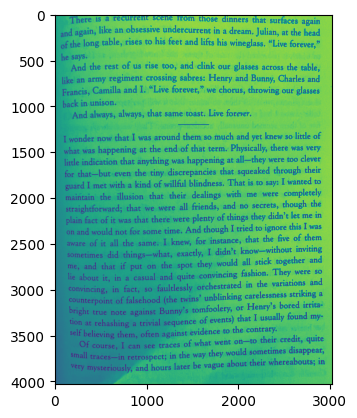

In [145]:
plt.imshow(images[0])

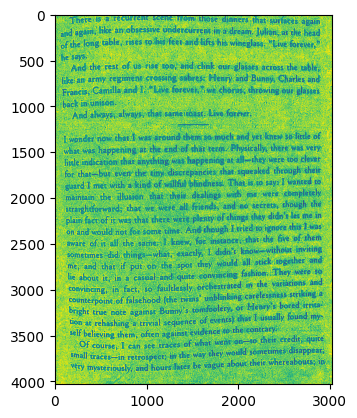

In [146]:
plt.imshow(images[1])

In [147]:
edited_image = images[1]
data = pytesseract.image_to_data(edited_image, output_type=Output.DICT)

In [148]:
print(data)

{'level': [1, 2, 3, 4, 5, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 4, 5, 4, 5, 2, 3, 4, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5], 'par_num': [0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 1, 1], 'word_num': [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1], 'left': [0, 1942, 1942, 1942, 1942, 1943, 1943, 1941, 1941, 1941, 1941, 1935, 1935, 1935, 1935, 1952, 1952, 1952, 1952, 1964, 1964, 1964, 1964, 0, 0, 0, 0], 'top': [0, 128, 128, 128, 128, 154, 154, 162, 162, 162, 162, 219, 219, 219, 219, 143, 143, 143, 143, 190, 190, 200, 200, 0, 0, 0, 0], 'width': [3024, 37, 37, 37, 37, 4, 4, 39, 39, 39, 39, 29, 29, 29, 29, 21, 21, 16, 16, 8, 8, 9, 9, 3024, 3024, 3024, 3024], 'height': [4032, 3

In [142]:
n_boxes = len(data['level'])
for i in range(n_boxes):
    # filter out weakest confidence recognitions so bounding box around everything isn't drawn
    if int(data['conf'][i]) > 10: # out of 100
        (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
        cv2.rectangle(edited_image, (x, y), (x + w, y + h), (0, 255, 0), 5)  # green rectangle drawn

In [143]:
output_file = 'images/book_output_improved.png'
cv2.imwrite(output_file, edited_image)

True

## Round 2

In [165]:
# Read the image with shadows
img = cv2.imread('images/book.jpeg')

# Split the image into its RGB channels
rgb_planes = cv2.split(img)

# Process each channel to remove shadows
result_planes = []
result_norm_planes = []
for plane in rgb_planes:
    # Dilate the image to grow the white region where the shadows are not present
    dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
    # Apply median blur to the dilated image to smooth it out and use it as the background image
    bg_img = cv2.medianBlur(dilated_img, 21)
    # Subtract the background image from the original image plane
    diff_img = 255 - cv2.absdiff(plane, bg_img)
    # Normalize the result to stretch the pixel intensity range to [0,255]
    norm_img = cv2.normalize(diff_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    # Store the processed planes
    result_planes.append(diff_img)
    result_norm_planes.append(norm_img)

In [170]:
# Merge the processed planes back into an RGB image
result = cv2.merge(result_planes)
result_norm = cv2.merge(result_norm_planes)

# Save the de-shadowed images for inspection
cv2.imwrite('images/shadows_out.png', result)
cv2.imwrite('images/shadows_out_norm.png', result_norm)

# Convert to grayscale
gray = cv2.cvtColor(result_norm, cv2.COLOR_BGR2GRAY)

# Apply OCR using pytesseract on the normalized, shadow-removed image
custom_config = r'--oem 3 --psm 6'
text = pytesseract.image_to_string(gray, config=custom_config)
print(text)

There is a FOercens shen trom those dinners that surfaces again
and again, like an obsessive undercurrent in a dream. Julian, at the head
of the long table, rises to his feet and lifts his wineglass. “Live forever,”
he says.

And the rest of us rise too, and clink our glasses across the table,
like an army regiment crossing sabres: Henry and Bunny, Charles and
Francis, Camilla and I. “Live forever,” we chorus, throwing our glasses
back in unison.

And always, always, that same toast. Live forever.

I wonder now that I was around them so much and yet knew so little of
what was happening at the end of that term. Physically, there was very
little indication that anything was happening at all—they were too clever
fr that—but even the tiny discrepancies that squeaked through their
guard I met with a kind of willful blindness. That is to say: I wanted to
maintain the illusion that their dealings with me were completely
straightforward; that we were all friends, and no secrets, though the
pla

In [167]:
data = pytesseract.image_to_data(gray, output_type=Output.DICT)

In [171]:
# Convert the grayscale image back to BGR format before drawing colored rectangles
colored_img = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

n_boxes = len(data['level'])
for i in range(n_boxes):
    if int(data['conf'][i]) > 10:
        (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
        # Draw a green rectangle on the grayscale image that's been converted to color
        cv2.rectangle(colored_img, (x, y), (x + w, y + h), (0, 255, 0), 5)

In [172]:
output_file = 'images/book_output_improved.png'
cv2.imwrite(output_file, colored_img)

True

## Cleaned attempt

In [173]:
def remove_shadows(image_path):
    img = cv2.imread(image_path)
    rgb_planes = cv2.split(img)

    # result_planes = []
    result_norm_planes = []
    for plane in rgb_planes:
        dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
        bg_img = cv2.medianBlur(dilated_img, 21)
        diff_img = 255 - cv2.absdiff(plane, bg_img)
        norm_img = cv2.normalize(diff_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
        # result_planes.append(diff_img)
        result_norm_planes.append(norm_img)

    # result = cv2.merge(result_planes)
    result_norm = cv2.merge(result_norm_planes)
    return result_norm

In [174]:
def save_images(images, paths):
    for image, path in zip(images, paths):
        cv2.imwrite(path, image)

In [175]:
def perform_ocr(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    custom_config = r'--oem 3 --psm 6'
    text = pytesseract.image_to_string(gray, config=custom_config)
    return text

In [176]:
def draw_bounding_boxes(image, data):
    n_boxes = len(data['level'])
    for i in range(n_boxes):
        if int(data['conf'][i]) > 10:
            (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 5)
    return image

In [ ]:
# Main execution
image_path = 'images/book.jpeg'
shadows_out_norm_path = 'images/shadows_out_norm.png'

result, result_norm = remove_shadows(image_path)
save_images(result_norm, [shadows_out_norm_path])

text = perform_ocr(result_norm)
print(text)

data = pytesseract.image_to_data(result_norm, output_type=Output.DICT)
colored_img = cv2.cvtColor(result_norm, cv2.COLOR_BGR2RGB)  # Convert to RGB for colored drawing
colored_img_with_boxes = draw_bounding_boxes(colored_img, data)

output_file = 'images/book_output_improved.png'
cv2.imwrite(output_file, colored_img_with_boxes)

## OCR for sentence-level segmentation

In [29]:
def get_surrounding_words(words, word_index, radius=10):
    start_index = max(word_index - radius, 0)
    end_index = min(word_index + radius + 1, len(words))
    return words[start_index:word_index], words[word_index + 1:end_index]

In [46]:
# collect all words and their bounding boxes
words_and_boxes = []

for i in range(len(data['text'])):
    if int(data['conf'][i]) > 10:
        word = data['text'][i]
        bounding_box = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
        words_and_boxes.append((word, bounding_box))

# search for the desired word, e.g., banal
desired_word = 'banal'
desired_word_index = None
for index, (word, box) in enumerate(words_and_boxes):
    if word.lower() == desired_word.lower():
        desired_word_index = index
        break

In [47]:
if desired_word_index is not None:
    before_words, after_words = get_surrounding_words(words_and_boxes, desired_word_index, 10)

    # desired word
    x, y, w, h = words_and_boxes[desired_word_index][1]
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 5) # this is BGR (Blue, Green, Red) format!

    # words before the desired word
    for _, box in before_words:
        x, y, w, h = box
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 5)

    # words after the desired word
    for _, box in after_words:
        x, y, w, h = box
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 5)
else:
    print("desired word not found in the text.")

In [48]:
output_file = 'images/book2_context.png'
cv2.imwrite(output_file, image)

True